In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit import *
from qiskit.visualization import plot_histogram
%run CnotDecomp.ipynb #for importing ccx function
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor

IBMQ.save_account('fb30d6ed3e7c1557fe60e36b2c8818ea67ec079e4bc1a9d0ab89b0be7f42fdaf7a7934f3354e4bd67069ea5b783bdb6fa2c7826015aead948821b4ace90f4cf4')

configrc.store_credentials:WARNING:2020-06-10 16:09:50,340: Credentials already present. Set overwrite=True to overwrite.


In [3]:
def completeGraphWalk(N,qc,qreg,qcoin):
    qc.swap(qreg[0:N],qcoin)
    return qc

def hadamardCoin(N,qc,qcoin):
    qc.h(qcoin)
    return qc

def grover3Coin(N,qc,qcoin):
    qc.h(qcoin)
    qc.x(qcoin)
    qc.h(qcoin[2])
    qc.toffoli(qcoin[0],qcoin[1],qcoin[2])
    qc.h(qcoin[2])
    qc.x(qcoin)
    qc.h(qcoin)
    qc.barrier()
    return qc

In [4]:
def getStateVector(qc):
    backend = Aer.get_backend('statevector_simulator')
    job_sim = execute(qc, backend=backend)
    result_sim = job_sim.result()
    print(result_sim.get_statevector())

def getMeas(qc):
    backend = Aer.get_backend('qasm_simulator')
    job_sim = execute(qc, backend=backend,shots=1000)
    result_sim = job_sim.result()
    result_counts = result_sim.get_counts(qc)
    plot_histogram(result_counts)


In [5]:
def oracle(marked,N):
    qreg = QuantumRegister(N)
    qcoin = QuantumRegister(N)
    qc = QuantumCircuit(qreg,qcoin)
    D= np.ones(2**N)
    D[marked] = -1
    D[0] = -1
    print(D)
    qc.diagonal(D.tolist(),qreg)
    qc = transpile(qc,basis_gates =['cx','u3'],optimization_level=3)
    return qc

def runWalk(qc,qreg,qcoin,markedVertex,N,times):
    qcaux = oracle(markedVertex,N)
    qc.h(qreg)
    
    for i in range(times):
        qc.append(qcaux,range(2*N))
        qc.barrier()
        qc= grover3Coin(N,qc,qcoin)
        qc= completeGraphWalk(N,qc,qreg,qcoin)
        qc.barrier()
        
    return qc

In [12]:
N=3

qreg = QuantumRegister(N)
qcoin = QuantumRegister(N)
creg = ClassicalRegister(N)

qc = QuantumCircuit(qreg,qcoin,creg)

qc = runWalk(qc,qreg,qcoin,7,N,2)


qc.measure(qreg[0],creg[0])
qc.measure(qreg[1],creg[1])    
qc.measure(qreg[2],creg[2])    
qc.draw()

[-1.  1.  1.  1.  1.  1.  1. -1.]


┌───┐┌─────────────┐ ░                                     ░          »
q134_0: ┤ H ├┤0            ├─░─────────────────────────────────────░──X───────»
        ├───┤│             │ ░                                     ░  │       »
q134_1: ┤ H ├┤1            ├─░─────────────────────────────────────░──┼──X────»
        ├───┤│             │ ░                                     ░  │  │    »
q134_2: ┤ H ├┤2            ├─░─────────────────────────────────────░──┼──┼──X─»
        └───┘│  circuit195 │ ░ ┌───┐┌───┐          ┌───┐┌───┐      ░  │  │  │ »
q135_0: ─────┤3            ├─░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░──X──┼──┼─»
             │             │ ░ ├───┤├───┤       │  ├───┤├───┤      ░     │  │ »
q135_1: ─────┤4            ├─░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░─────X──┼─»
             │             │ ░ ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ░        │ »
q135_2: ─────┤5            ├─░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░────────X─»
             └─────────────┘ ░ └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░          »
  c3_0: ══════════════════════════════════════════════════════════════════════»
                                                                              »
  c3_1: ══════════════════════════════════════════════════════════════════════»
                                                                              »
  c3_2: ══════════════════════════════════════════════════════════════════════»
                                                                              »
«         ░ ┌─────────────┐ ░                                     ░          »
«q134_0: ─░─┤0            ├─░─────────────────────────────────────░──X───────»
«         ░ │             │ ░                                     ░  │       »
«q134_1: ─░─┤1            ├─░─────────────────────────────────────░──┼──X────»
«         ░ │             │ ░                                     ░  │  │    »
«q134_2: ─░─┤2            ├─░─────────────────────────────────────░──┼──┼──X─»
«         ░ │  circuit195 │ ░ ┌───┐┌───┐          ┌───┐┌───┐      ░  │  │  │ »
«q135_0: ─░─┤3            ├─░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░──X──┼──┼─»
«         ░ │             │ ░ ├───┤├───┤       │  ├───┤├───┤      ░     │  │ »
«q135_1: ─░─┤4            ├─░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░─────X──┼─»
«         ░ │             │ ░ ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ░        │ »
«q135_2: ─░─┤5            ├─░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░────────X─»
«         ░ └─────────────┘ ░ └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░          »
«  c3_0: ════════════════════════════════════════════════════════════════════»
«                                                                            »
«  c3_1: ════════════════════════════════════════════════════════════════════»
«                                                                            »
«  c3_2: ════════════════════════════════════════════════════════════════════»
«                                                                            »
«         ░ ┌─┐      
«q134_0: ─░─┤M├──────
«         ░ └╥┘┌─┐   
«q134_1: ─░──╫─┤M├───
«         ░  ║ └╥┘┌─┐
«q134_2: ─░──╫──╫─┤M├
«         ░  ║  ║ └╥┘
«q135_0: ─░──╫──╫──╫─
«         ░  ║  ║  ║ 
«q135_1: ─░──╫──╫──╫─
«         ░  ║  ║  ║ 
«q135_2: ─░──╫──╫──╫─
«         ░  ║  ║  ║ 
«  c3_0: ════╩══╬══╬═
«               ║  ║ 
«  c3_1: ═══════╩══╬═
«                  ║ 
«  c3_2: ══════════╩═
«

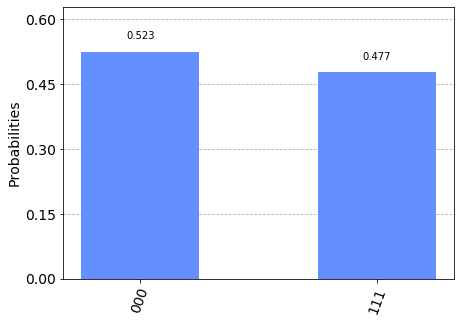

In [13]:

backend = Aer.get_backend('qasm_simulator')

job_sim = execute(qc, backend=backend,shots=1000)
result_sim = job_sim.result()
result_counts = result_sim.get_counts(qc)
plot_histogram(result_counts)

In [58]:
def RealRunning(qc_grover,backend_str):
    IBMQ.load_account()
    provider = IBMQ.get_provider(group='open')
    backend = provider.get_backend(backend_str)
    job = execute(qc_grover, backend=backend)
    display(job_monitor(job))
    result = job.result().get_counts()
    return result

from qiskit import Aer
for backend in Aer.backends():
    print(backend.name())

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


In [57]:
ibm_backend = 'ibmq_ourense'
result_ibm = RealRunning(qc,ibm_backend)
#-- compared results
legend = ['QASM',ibm_backend]
plot_histogram([result_qasm,result_ibm], legend=legend)

ibmqfactory.load_account:WARNING:2020-06-01 16:48:38,461: Credentials are already in use. The existing account in the session will be replaced.


TranspilerError: 'Number of qubits (6) in circuit492 is greater than maximum (5) in the coupling_map'